# Twitter News Sentiment Analysis
Vader was used to run sentiment analysis on five news sources' last 100 tweets.
- Most of BBC's tweets tend to be neutral.
- CBS is the most positive out of all the new sources.
- CNN and Fox News tends to be more negative with their tweets.
- The sentiment of tweets can change over a period of time. If run again in the future, the polarity of the new sources can change depending on the current events at the time.

In [19]:
# Dependencies
import tweepy
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
# Twitter API Keys
consumer_key = "xrJ7dRORFVHzsQWMRFQGKEQ6Y"
consumer_secret = "qASDI68WPNM6PxGgssZq3krS2b1pSFQjLhvJZhXf7si8ltKmCu"
access_token = "930222466764591104-kFbSGGI3ofKfFw8Cc68ioH696RaYOEI"
access_token_secret = "2X65sl1rvV7Z9S0d0te9AR6dtsBODOW6s6ReFwZJPCmRA"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")
sentiments = []
counter = 1

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    user_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through pages of tweets 
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x+1)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate array
            sentiments.append({"News": user,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})
            
            counter += 1

In [22]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["News", "Compound", "Positive", "Negative", "Neutral", "Tweets Ago"]]
sentiments_pd = sentiments_pd.sort_values(["Tweets Ago"], ascending = False).reset_index(drop=True)
sentiments_pd.to_csv("tweet_sentiment.csv")
sentiments_pd.head()

,News,Compound,Positive,Negative,Neutral,Tweets Ago
0,@NYTimes,0.0000,0.000,0.000,1.000,500
1,@NYTimes,0.9186,0.619,0.000,0.381,499
2,@NYTimes,0.2709,0.126,0.083,0.790,498
3,@NYTimes,0.2263,0.170,0.138,0.692,497
4,@NYTimes,0.5719,0.227,0.000,0.773,496


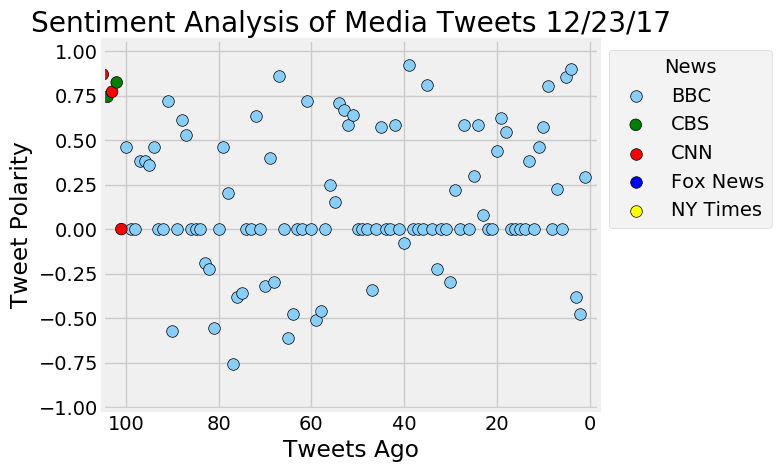

In [23]:
# Scatter Plot for Sentiment Analysis of Media Tweets
plt.style.use('fivethirtyeight')
plt.title("Sentiment Analysis of Media Tweets %s" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

bbc_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@BBC"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@BBC"],
                      c="lightskyblue", label="BBC", alpha=1, linewidths=0.5, edgecolor="black", s=70)

cbs_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@CBS"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@CBS"],
                      c="gr", label="CBS", alpha=1, linewidths=0.5, edgecolor="black", s=70)

cnn_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@CNN"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@CNN"],
                      c="red", label="CNN", alpha=1, linewidths=0.5, edgecolor="black", s=70)

fox_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@FoxNews"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@FoxNews"],
                      c="blue", label="FoxNews", alpha=1, linewidths=0.5, edgecolor="black", s=70)

nyt_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@NYTimes"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@NYTimes"],
                      c="yellow", label="NYTimes", alpha=1, linewidths=0.5, edgecolor="black", s=70)

plt.legend((bbc_plot, cbs_plot, cnn_plot, fox_plot, nyt_plot),
           ("BBC","CBS","CNN","Fox News","NY Times"),title="News", bbox_to_anchor=(1, 1))

plt.xlim(105,-2)

plt.savefig('analysis_tweets.png')
plt.show()

In [24]:
sentiments_avg = sentiments_pd.groupby(["News"], as_index=False).mean()
sentiments_avg.drop(['Tweets Ago', 'Positive', 'Negative', 'Neutral'], axis=1, inplace=True)
sentiments_avg

,News,Compound
0,@BBC,0.134191
1,@CBS,0.443424
2,@CNN,-0.081068
3,@FoxNews,-0.043470
4,@NYTimes,0.015086


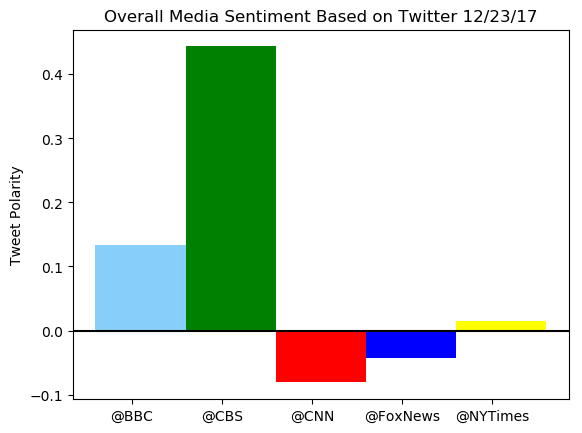

In [25]:
#Bar Plot for Overall Media Sentiment Based on Twitter
plt.rcdefaults()
fig, ax = plt.subplots()

news = ["BBC", "CBS", "CNN", "FoxNews", "NYTimes"]
colors = ['lightskyblue', 'green', 'red', 'blue', 'yellow']
compound_bar = []
y = 0 

for x in sentiments_avg.iterrows():
    compound_bar.append(sentiments_avg['Compound'][y])
    y += 1

x_axis = np.arange(len(compound_bar))
plt.bar(x_axis, compound_bar, color=colors, align="edge", width=1)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, news)

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment Based on Twitter %s" % (time.strftime("%x")))
ax.set_xticklabels(sentiments_avg['News'])

plt.axhline(0, color='black')

plt.savefig('overall_sentiments.png')
plt.show()